# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns',None)
#init_notebook_mode(connected=True)

# Variables Description

1.  age(numeric)
2.  job : type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3.  marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
4.  education (categorical: "unknown","secondary","primary","tertiary")
5.  default: has credit in default? (binary: "yes","no")
6.  balance: average yearly balance, in euros (numeric)
7.  housing: has housing loan? (binary: "yes","no")
8.  loan: has personal loan? (binary: "yes","no")
9.  contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")
17. deposit: has the client subscribed to a term deposit?(binary: "yes","no")


In [2]:
df = pd.read_csv("/content/BankMarketingData.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Data Processing

In [3]:
df.shape

(11162, 17)

In [4]:
df.isnull().sum()/len(df) * 100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [5]:
df.rename(columns={'y':'Deposit'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# Data Visualization

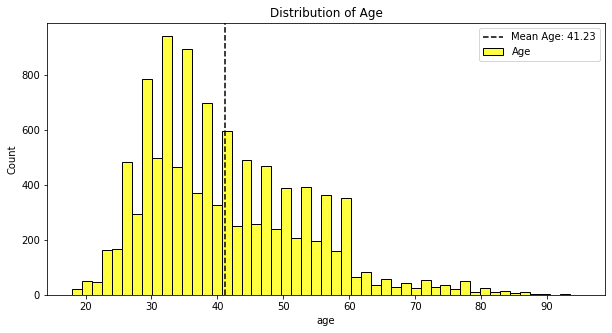

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'],color='Yellow',label='Age')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(df['age'].mean(),2)))
plt.legend()
plt.title('Distribution of Age')
plt.show()

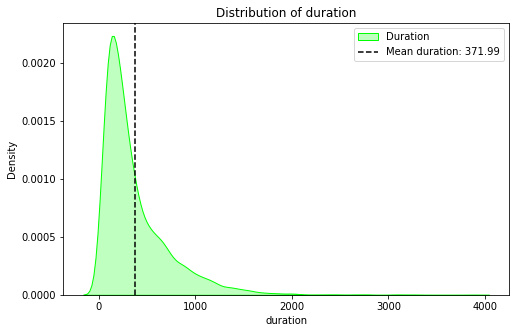

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['duration'],color='Lime',shade=True,label='Duration')
plt.axvline(x=df['duration'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(df['duration'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()

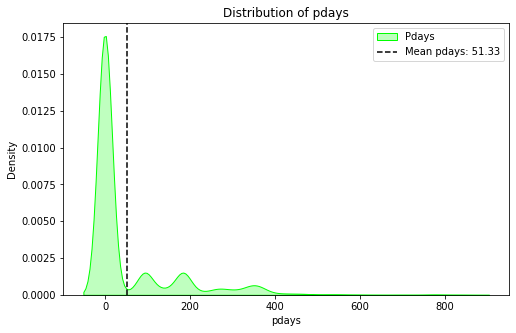

In [9]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['pdays'],color='Lime',shade=True,label='Pdays')
plt.axvline(x=df['pdays'].mean(),color='k',linestyle ="--",label='Mean pdays: {}'.format(round(df['pdays'].mean(),2)))
plt.legend()
plt.title('Distribution of pdays')
plt.show()

In [10]:
fig=px.bar(df.job.value_counts().reset_index().rename(columns={'index':'Job','job':'Count'}),x='Job',y='Count',color='Job',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")

Insight📊:
 - Management and Blue-collar Job type Clients are maximum in the bank
 - There are very less number ofstudent customers in the bank

In [11]:
fig=px.pie(df.marital.value_counts().reset_index().rename(columns={'index':'Marital-Status','marital':'Count'}),names='Marital-Status',values='Count',hole=0.5,template='plotly_white',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Marital-Status')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

   - Most of the clients in the bank are Married - 56.9% and Single - 31.5%

In [12]:
fig=px.bar(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),x='Education',y='Count',color='Education',text='Count',template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,legend_title_text='<b>Education',title_text='<b>Education of the customers',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()
fig=px.pie(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),names='Education',values='Count',hole=0.5,template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Education')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:
   - Most of the customers in the bank are related to  Secondary - 49.1% and Tertiary - 33% Category
   - only 13.4% of the clients are related to primary education category

In [13]:
fig=go.Figure()
from plotly.subplots import make_subplots
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Credit in Default', 'Housing Loan','Personal Loan'))
fig.add_trace(go.Pie(values=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Count'],labels=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Default'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Has Credit in Default?',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Count'],labels=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Housing'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Housing Loan',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Count'],labels=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Loan'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Personal Loan',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text=" ",title_text='<b style="color:black; font-size:100%;">Credit and Loan Analysis',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

Insight📊:
   - 98.3% customers in the bank doesn't have Credit in Default
   - 52.7% customers in the bank doesn't have Housing Loan
   - 86.7% customers in the bank doesn't have Personal Loan
   - on comparing with Personal Loan and Housing Loan, Most of the clients subscribed for Housing Loan - 47.3%

In [14]:
fig=px.pie(df.contact.value_counts().reset_index().rename(columns={'index':'Contact','contact':'Count'}),names='Contact',values='Count',hole=0.5,template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Contact')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:
   - Most of the customers in the bank are contacted through Cellular - 72%
   - only 6.93% of the clients are contacted through telephone

In [15]:
fig=px.bar(df.month.value_counts().reset_index().rename(columns={'index':'Month','month':'Count'}),x='Month',y='Count',color='Month',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Last Contact Month of the year',font_family="Times New Roman",title_font_family="Times New Roman")

Insight📊:
   - Most of the clients in the bank are contacted in the months of May, Jun, Jul and in Aug last year.
   - very few of the clients are contacted in the months of Sep, Mar and in Dec

In [16]:
fig=px.bar(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),x='Poutcome',y='Count',color='Poutcome',text='Count',color_discrete_sequence=['grey','red','green','blue'],template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()
fig=px.pie(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),names='Poutcome',values='Count',hole=0.5,template='simple_white',color_discrete_sequence=['grey','red','blue','green'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Poutcome')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

   - From the Outcomes of the previous marketing Campaign most of the results are Unknown ~ 74.6% and Failure ~ 11%
   - Success rate is very less ~ 9.6%
   - From the Analysis, on doing Marketing Campaigns there will be more Failure than Success

In [17]:
fig=px.pie(df.groupby(['deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),names='deposit',values='Count',template='ggplot2',hole=0.8)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Deposit')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Term Deposits',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

   - From the Outcomes of the previous marketing Campaign 52.6% of the Clients are not subsribed for the Term Deposits
   - only 47.4% are subsribed to the term deposits

In [18]:
a=df.groupby(['job'],as_index=False)['balance'].mean()
a['balance']=round(a['balance'],1)
fig=px.bar(a.sort_values(by='balance',ascending=False),x='job',y='balance',text='balance',color='job',template='ggplot2')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Average balance of the clients by their job type',legend_title_text='Job Type',font_family="Times New Roman",title_font_family="Times New Roman")

In [19]:
fig=px.box(df,x='job',y='age',color='job',template='simple_white',title='<b>Distribution of age based on job type')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Job type")

In [20]:
fig=px.box(df,x='marital',y='age',color='marital',template='simple_white',title='<b>Distribution of age based on Marital Status',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Marital Status")
fig.show()

Insight📊:
   - The median age of the married people is 43 and for the divorced people is 46.
   - The median age of the people who are single is 31

In [21]:
fig=px.box(df,x='education',y='age',color='education',template='simple_white',title='<b>Distribution of age based on Education Level')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Education Level")
fig.show()

Insight📊:
   - The median age of the primary education level of the clients is 47 and the secondary education level of the clients is 38.
   - The median age of the clients whose Education level is unknown is 45
   - The median age of the clients whose Education level Tertiary is 36

In [22]:
fig=px.box(df,x='housing',y='age',color='housing',template='simple_white',title='<b>Distribution of age based on Housin Loan Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Housing Loan")
fig.show()

Insight📊:
   - The median age of the clients who subscribed for the housing loan is 37.
   - The median age of the clients who are not  subscribed for the housing loan is 41.

In [23]:
fig=px.box(df,x='loan',y='age',color='loan',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'],title='<b>Distribution of age based on Personal Loan Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Personal Loan")
fig.show()

Insight📊:
   - The median age of the clients who subscribed and not subscribed for the personal loan is almost same.

In [24]:
fig=px.box(df,x='deposit',y='age',color='deposit',template='simple_white',color_discrete_sequence=['DeepSkyBlue','LightCoral'],title='<b>Distribution of age based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

Insight📊:
   - The median age of the clients who subscribed and not subscribed for the term deposit is almost same.

In [25]:
fig=px.box(df,x='deposit',y='pdays',color='deposit',template='simple_white',color_discrete_sequence=['DeepSkyBlue','LightCoral'],title='<b>Distribution of pdays based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

In [26]:
fig=px.box(df,x='poutcome',y='pdays',color='poutcome',template='simple_white',title='<b>Effect of pdays on poutcome',color_discrete_sequence=['Gray','BlueViolet','OrangeRed','LimeGreen'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Credit in Default")
fig.update_layout(title_x=0.08,template='simple_white',showlegend=True,legend_title_text="poutcome",title_text='<b style="color:black; font-size:100%;">Effect of pdays on Outcome of Previous Marketing Campaign<br><b style="font-family: Times New Roman; font-size:1.0vw">number of days that passed by after the client was last contacted from a previous campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

Insight📊:
   - The median days that passed after contacting the customer for the failure of the previos campaigning outcome is 200 days.
   - The median days that passed after contacting the customer for the success of the previos campaigning outcome is 168 days.

In [27]:
fig=px.box(df,x='poutcome',y='pdays',color='deposit',template='simple_white',title='<b>Effect of pdays on poutcome and term deposits',color_discrete_sequence=['YellowGreen','MediumPurple'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Deposit")
fig.show()

In [28]:
fig=px.box(df,x='deposit',y='duration',color='deposit',template='simple_white',color_discrete_sequence=['YellowGreen','LightCoral'],title='<b>Effect of Duration on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

Insight📊:
   - The median duration of the clients who subscribed for the term deposit is 426.
   - The median duration of the clients who  are not subscribed for the term deposit is 163.
   - It is clear, that the duration is highly affecting the target variable.

In [29]:
df['Duration']=df['duration'].apply(lambda x: 'Above_Average_Duration' if x>=df['duration'].mean() else 'Below_Average_Duration')
a=df.groupby(['Duration','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Duration')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Duration',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

Insight📊:
 - if the duration is above average then 77.4% of clients are to term deposits and are not subscribed
 - if the duration is below average then 31.6 % of clients are subscribed to term deposits and 68.4 % are not subscribed

In [30]:
df['Balance']=df['balance'].apply(lambda x: 'Above_Average' if x>=df['balance'].mean() else 'Below_Average')
a=df.groupby(['Balance','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Balance')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Balance',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Balance on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average balance and below average balance</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

Insight📊:
 - if the balance is above average then 57.3% of clients are subscribed to term deposits and 42.7% are not subscribed
 - if the balance is below average then 43.6% of clients are subscribed to term deposits and 56.4% are not subscribed

In [31]:
k=df.groupby(['housing','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=k[k['housing']=='yes']['Count'],labels=k[k['housing']=='yes']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Having Housing Loan',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=k[k['housing']=='no']['Count'],labels=k[k['housing']=='no']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Not having Housing loan',showlegend=True),row=1,col=2)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Housing Loan',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.add_annotation(dict(x=0.15, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>Have a Loan</b>"))
fig.add_annotation(dict(x=0.83, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>No Loan</b>"))
fig.update_traces(textposition='outside', textinfo='percent+label')

Insight📊:

- 57% of Clients those not having housing loan are subscribed for the term deposits and 36.6% of clients those  having housing loan are subscribed to  the term deposits.

In [32]:
k=df.groupby(['loan','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=k[k['loan']=='yes']['Count'],labels=k[k['loan']=='yes']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Having Personal Loan',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=k[k['loan']=='no']['Count'],labels=k[k['loan']=='no']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Not having Personal loan',showlegend=True),row=1,col=2)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Personal Loan',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.add_annotation(dict(x=0.15, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>Have a Loan</b>"))
fig.add_annotation(dict(x=0.83, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>No Loan</b>"))
fig.update_traces(textposition='outside', textinfo='percent+label')

Insight📊:
- 49.5 % of Clients those not having personal loan are subscribed for the term deposits and 33.22 % of clients those  having personal loan are subscribed to  the term deposits.

In [33]:
d=df.groupby(['marital','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Divorced', 'Married','Single'))

fig.add_trace(go.Pie(values=d[d['marital']=='divorced']['Count'],labels=d[d['marital']=='divorced']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Divorced',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=d[d['marital']=='married']['Count'],labels=d[d['marital']=='married']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Married',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=d[d['marital']=='single']['Count'],labels=d[d['marital']=='single']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Single',showlegend=True),row=1,col=3)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Marital Status',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_traces(textposition='inside', textinfo='percent')

Insight📊:
 - Out of divorced Clients, 48.1% are subscribed and 51.9% are not subscribed to the term deposits
 - Out of married Clients, 43.4% are subscribed and 56.6% are not subscribed to the term deposits
 - Out of single Clients, 54.3% are subscribed and 45.7% are not subscribed to the term deposits

In [34]:
a=df.groupby(['job','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('job')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='job',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Term Depositors based on Job Type</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

Insight📊:
 - Clients whose job types in retired, student, unemployed and housemaid are subscribed more to term deposits.

In [35]:
fig=px.treemap(df.groupby(['job','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),path=['job','deposit','Count'],template='simple_white')
fig.update_layout(title_x=0.5,template='simple_white',title_text='<b style="color:black; font-size:100%;">Treemap on count of clients who subscribed the Term Deposits or not based on Job',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

In [36]:
fig=px.line(df.groupby(['age','loan'],as_index=False)['job'].count().rename(columns={'job':'Count'}),x='age',y='Count',color='loan',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Age on Personal Loan')
fig.show()

Insight📊:

- From the Analysis, even the mid-age group clients are subscribed more for the personal loans, there are more number of clients who are not subscribing for the personal loans in this age group.
- From the Analysis, we can see that old age group clients are not at all interested in subscribing for the personal loans.

In [37]:
fig=px.line(df.groupby(['age','housing'],as_index=False)['job'].count().rename(columns={'job':'Count'}),x='age',y='Count',color='housing',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Age on Housing Loan')
fig.show()

Insight📊:
   - From the Analysis, the mid-age group clients are subscribed more for the housing loans.
   - From the Analysis, we can see that old age group clients are not intrested in subscribing for the housing loans.

In [38]:
fig=px.line(df.groupby(['age','deposit'],as_index=False)['job'].count().rename(columns={'job':'Count'}),x='age',y='Count',color='deposit',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.08,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Age on Term Deposits')
fig.add_annotation(
  x=55,  # arrows' head
  y=165,  # arrows' head
  ax=60,  # arrows' tail
  ay=200,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='Even <b style="color: Brown;">mid-age group</b> clients <b style="color: green;">subscribed</b> more for the term deposits,<br>     there is a more domination of clients from this group who are <br><b style="color: red;">not subscribed</b> for the <b style="color: Indigo;">term deposits</b>.',  # if you want only the arrow
  showarrow=True,
  arrowhead=3,
  arrowsize=1,
  arrowwidth=1,
  arrowcolor='black'
)
fig.add_annotation(
  x=75,  # arrows' head
  y=30,  # arrows' head
  ax=80,  # arrows' tail
  ay=65,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='<b style="color: Brown;">old age group</b> clients are <b style="color: Green;">subscribing</b> the <b style="color: Indigo;">term deposits</b> more<br> and count of <b style="color: red;">not subscribing</b> to the deposits is <b style="color: Green;">less</b>.',  # if you want only the arrow
  showarrow=True,
  arrowhead=3,
  arrowsize=1,
  arrowwidth=1,
  arrowcolor='black'
)
fig.show()

Insight📊:
   - From the Analysis,Even the mid-age group clients subscribed more for the term deposits, there is a more domination of clients from this group who are not subscribed for the term deposits
   - From the Analysis, we can see that old age group clients are subscribing the term deposits more and count of not subscribing to the deposits is less. It is well for the banks to focus on old age group clients to get more subscriptions for the term deposits

In [39]:
a=df.groupby(['month','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('month')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='month',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Deposits based on last Contact month',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()

Insight📊:
   - Most of the clients in the bank are contacted in the months of May, Jun, Jul and in Aug last year. More Clients subscribed to style="color: Magenta;">term deposits in this months only.
   - very few of the clients are contacted in the months of Sep, Mar and in Dec. Even less contacts performed in these months, more number of clients subscribed to term deposits in these months. It is better to Contact clients more in this months.

In [40]:
fig=px.line(df.groupby(['campaign','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),x='campaign',y='Count',color='deposit',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.08,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Campaign on Term Deposits<b><br><b style="font-family: Times New Roman; font-size:1vw">number of contacts performed during the campaign and for this client </b>')
fig.show()

Insight📊:
   - From the analysis, with the increase in contacts performed for the clients in the campaign there is more chance for the client to unsubscribe the term deposit
   - It is better to perform less contacts to the client to make them subscribe to the term deposits

In [41]:
fig=px.line(df.groupby(['previous','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),x='previous',y='Count',color='deposit',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.08,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Previous Campaign on Term Deposits<b><br><b style="font-family: Times New Roman; font-size:1vw">number of contacts performed before this campaign and for this client </b>')
fig.show()

Insight📊:
   - From the analysis, with the increase in previous contacts performed for the clients before this campaign there is more chance for the client to unsubscribe the term deposit
   - It is better to perform atmost 2 or 3 contacts.

In [42]:
a=df.groupby(['poutcome','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percentile']=round(a['Count']*100/a.groupby('poutcome')['Count'].transform('sum'),1)
a['percentile']=a['percentile'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='poutcome',y='Count',color='deposit',text='percentile',template='simple_white',barmode='group',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.08,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Outcome of Previous Marketing Campaign<br><b style="font-family: Times New Roman; font-size:1.0vw">% of term deposits opened based on the outcome of previous campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()

Insight📊:
 - From the Outcome of previous Campaign, if the outcome is Failure, then there is a 50% chance to the client will not subscribe to the term deposit. out of all failure outcomes 50.3% of clients subscribes and 49.7%  are not subscribed</b> to the term deposits
 
 
 - From the Outcome of previous Campaign, if the outcome is Success, then there is a high chance to the client will subscribe to the term deposit. out of all success outcomes 91.3% of clients subscribes and 8.7% are not subscribed</b> to the term deposits

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:white;
            font-size:170%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 15px;
              color:black;
               border:black;
               border-width:0px;
               border-style:solid;
              font-family: Times New Roman;
              text-align:left;'>
         Conclusion
    </h3>
    </div>

 - Most of the clients in the bank are contacted in the months of May, Jun, Jul and in style="color: DarkMagenta;">Aug last year.out of that, most of the clients contacted in the month of may and also this is the month where clients are not intrested to subscribe the term deposits.very few of the clients are contacted in the months of Mar,Sep and in Dec.It is better to Contact the clients more in these months.
   
   
   
   - If Multiple Campaigns and multiple contacts are performed for the clients, there is more chance for the client to not intrested to subscribe for the term deposit. Atmost 2 or 3 contacts can be preferred to perform for the clients.
   
   
   - Occupation of the clients in Retired, student and housemaid are subscribed more to the term deposits.Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.
   
   
   - From the Analysis,Even the mid-age group clients subscribed more for the term deposits, there is a more domination of clients from this group who are not subscribed for the term deposits.old age group clients are subscribing the term deposits more and count of not subscribing to the deposits is less. It is well for the banks to focus on old age group clients to get more subscriptions for the term deposits.
   
   
   
 - From the Outcome of previous Campaign, if the outcome is Failure, then there is a 50% chance to the client will not subscribe to the term deposit. out of all failure outcomes 50.3% of clients subscribes and 49.7% are not subscribed to the term deposits
 
 
 - From the Outcome of previous Campaign, if the outcome is Success, then there is a high chance to the client will subscribe to the term deposit. out of all success outcomes 91.3% of clients subscribes and 8.7% are not subscribed to the term deposits
 
 
 - Clients who are not intrested to take housing loans may be intrested in subscribing for the term deposits.If the balance of client is above average blance then there is a chance to subscribe for the term deposit.

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Duration,Balance
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Above_Average_Duration,Above_Average
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Above_Average_Duration,Below_Average
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,Above_Average_Duration,Below_Average
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,Above_Average_Duration,Above_Average
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Above_Average_Duration,Below_Average


In [44]:
df.drop(['Duration', 'Balance'], axis=1, inplace=True)

In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [46]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [48]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

label_encoder = LabelEncoder()

df[cols_to_encode] = df[cols_to_encode].apply(label_encoder.fit_transform)

print(df.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome deposit  
0    5      8      1042         1     -1         0         3     yes  
1    5      8      1467         1     -1         0         3     yes  
2    5      8      1389         1     -1         0         3     yes  
3    5      8       579         1     -1         0         3     yes  
4    5      8       673         2     -1         0         3     yes  


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('deposit', axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

train_acc_score = accuracy_score(y_train, y_train_pred)
test_acc_score = accuracy_score(y_test, y_pred)

print('Training accuracy score:', train_acc_score)
print('Testing accuracy score:', test_acc_score)
print(classification_report(y_test, y_pred))

Training accuracy score: 0.8923731660880277
Testing accuracy score: 0.8266905508284819
              precision    recall  f1-score   support

          no       0.86      0.80      0.83      1166
         yes       0.80      0.85      0.82      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



#Here, I got 83% Accuracy Which is quite better than previous..After Doing Parameters Tunnning

In [54]:
#Hyperprameters Tunning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a random forest classifier object
rf = RandomForestClassifier(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(grid_search.best_params_)

# Use the best hyperparameters to create a new random forest classifier object
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Train the new random forest classifier object on the training data
rf_best.fit(X_train, y_train)

# Evaluate the new random forest classifier object on the testing data
y_pred = rf_best.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc_score)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy score: 0.8360949395432155


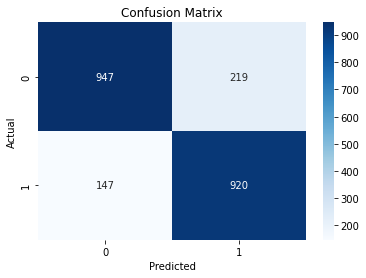

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()
